<a href="https://colab.research.google.com/github/alonzojp/AI-Chess-Bot/blob/main/%5BAICB%5D_json_to_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
file = open('drive/My Drive/lichess_db_eval.json')

!pip install ijson
!pip install chess

import ijson
import chess
import pandas as pd
from IPython.display import clear_output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.DataFrame(columns=['fen_notation', 'evaluation_value'])

data = []

with open("/content/drive/MyDrive/lichess_db_eval.json", 'r') as fp:

  for i in range(0, 21158950): # 21158950

    # print(str(100 * round(i/10000, 2)) + str("%"))
    # print(i)
    line = fp.readline()
    # if(line.split('"')[9] == 'mate'):
    #   print("-" * 200)
    #   temp = line.split('"')
    #   for i in temp:
    #     print(i)
    fen_notation = line.split('"')[3].split(" ")[0]
    pv_type = line.split('"')[9]
    evaluation_value = line.split('"')[10][1:-1]
    # print(line.split('"')[9], line.split('"')[10])
    # temp_df = pd.DataFrame([[fen_notation, evaluation_value]], columns=['fen_notation', 'evaluation_value'])

    # df = df.append(temp_df)
    data.append([fen_notation, pv_type, evaluation_value])
    # print(line.split('"')[3].split(" ")[0]) # Gets FEN board notation
    # print(line.split('"')[10][1:-1]) # Gets evaluation

    # board = chess.Board(line.split(' ')[0].split('"')[3])
    # display(board)
    # clear_output()

len(data)

df = pd.DataFrame(data, columns=['fen_notation', 'pv_type', 'evaluation_value'])

In [15]:
df

,fen_notation,pv_type,evaluation_value
0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR,cp,20
1,rnbqk1nr/pp2p1bp/3p2p1/2pP1p2/2P5/2N2N2/PP2PPP...,cp,64
2,2Rb2k1/3q1rpp/p3Q3/2N1p3/4P3/3Pp3/1P4PP/1K6,cp,0
3,rnbqkb1r/ppp1pppp/5n2/3p4/3P1B2/8/PPP1PPPP/RN1...,cp,0
4,2b1k3/pr5R/1p2pr2/5p2/2pP4/2P5/PP3PB1/R5K1,cp,994
...,...,...,...
21158945,rnbqk2r/pp1pppbp/5np1/8/3QN3/5N2/PPP1PPPP/R1B1...,cp,-26
21158946,r1b1r1kb/4pp1p/p1n3pB/1pp5/8/P2P3P/qPPQBPPN/1R...,cp,24
21158947,8/8/8/3p2b1/KP4k1/P1P5/8/5q2,mate,-6
21158948,1r3kr1/pp2qp2/4pNpb/3pP2p/P1pP3P/2P3P1/6P1/1R1...,cp,171


In [16]:
df.to_csv('from_json.csv')

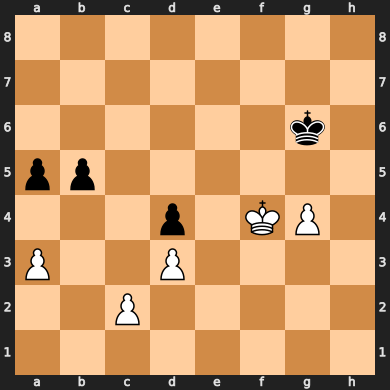

In [9]:
board = chess.Board('8/8/6k1/pp6/3p1KP1/P2P4/2P5/8 b - -')
display(board)

In [ ]:
df.to_csv('out.csv')

In [ ]:
# data = ijson.parse(open('/content/drive/MyDrive/lichess_db_eval.json', 'r'))

In [ ]:
# import json

# curly_idx = []
# jstr = ""
# first_curly_found = False
# counter = 0
# with open("/content/drive/MyDrive/lichess_db_eval.json", 'r') as fp:

#     #Reading file line by line
#     line = fp.readline()
#     lnum = 0
#     while line:
#         counter += 1
#         if(counter > 5):
#           break

#         for a in line:
#             if a == '{':
#                 curly_idx.append(lnum)
#                 first_curly_found = True
#             elif a == '}':
#                 curly_idx.pop()

#         # when the right curly for every left curly is found,
#         # it would mean that one complete data element was read
#         if len(curly_idx) == 0 and first_curly_found:
#             jstr = f'{jstr}{line}'
#             jstr = jstr.rstrip()
#             jstr = jstr.rstrip(',')
#             jstr[:-1]
#             if len(jstr) > 10:
#                 j = json.loads(jstr)
#             print(jstr)
#             jstr = ""
#             line = fp.readline()
#             lnum += 1
#             continue

#         if first_curly_found:
#             jstr = f'{jstr}{line}'

#         line = fp.readline()
#         lnum += 1
#         if lnum > 100:
#             break


In [ ]:
# with open("/content/drive/MyDrive/lichess_db_eval.json", 'r') as fp:
#   for i in range(0, 10):
#     line = fp.readline()

#     print("Board #" + str(i + 1))
#     print(line.split('"')[3].split(" ")[0]) # Gets FEN board notation
#     print(line.split('"')[10][1:-1]) # Gets evaluation

#     board = chess.Board(line.split(' ')[0].split('"')[3])
#     display(board)
#     print("-----")

In [ ]:
# objects = ijson.kvitems(data, 'fen.item')
# names = (v for k, v in objects if k == 'fen')
# for name in names:
#     print(name)

In [ ]:
# board = chess.Board('2bq1rk1/pr3ppn/1p2p3/7P/2pP1B1P/2P5/PPQ2PB1/R3R1K1 w - -')
# display(board)